In [1]:
import pandas as pd
import math

pd.set_option('display.max_rows', 120)

def display_full(data_frame):
    pd.set_option('display.max_columns', len(data_frame.columns))
    display(data_frame)

raw_df = (pd.read_csv("data.csv"))
display_full(raw_df)
# display(df.columns)

,id,listing_url,scrape_id,last_scraped,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,NaN,t,0,0,4,58,2020-10-11,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20201009050447,2020-10-10,"Romantic, stylish B&B houseboat in canal district",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/97647/p

In [2]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
#     'room_type': 'Id',
#     'accommodates': 'Ignore',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
    'beds': 'Float',
#     'amenities': 'Ignore',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
#     'availability_90': 'Ignore',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
    'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
display(df)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,1.0,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,Private room in apartment,1.0,2.0,59.0,3.0,1125.0,1.0,278.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.98
1,0.0,2.0,1.0,1.0,Centrum-Oost,Private room in townhouse,1.0,1.0,236.0,1.0,365.0,1.0,340.0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,2.63
2,1.0,2.0,1.0,0.0,Centrum-West,Entire apartment,1.0,1.0,125.0,14.0,180.0,1.0,5.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.15
3,1.0,1.0,1.0,1.0,Centrum-West,Private room in houseboat,1.0,1.0,138.0,2.0,730.0,1.0,219.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,2.05
4,1.0,2.0,1.0,1.0,Centrum-West,Private room in apartment,1.0,1.0,75.0,2.0,1825.0,1.0,336.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,0.0,892.0,1.0,1.0,Bos en Lommer,Entire apartment,1.0,2.0,137.0,1.0,365.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
18778,0.0,2.0,1.0,0.0,Westerpark,Entire apartment,2.0,0.0,120.0,5.0,60.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
18779,0.0,3.0,1.0,0.0,De Pijp - Rivierenbuurt,Private room in condominium,1.0,1.0,20.0,1.0,30.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
18780,0.0,0.0,1.0,0.0,Watergraafsmeer,Entire apartment,1.0,0.0,33.0,10.0,14.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [3]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_has_profile_pic            0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
bedrooms                        5.26
beds                            0.50
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
has_availability                0.00
number_of_reviews               0.00
review_scores_rating           13.53
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
instant_bookable                0.00
reviews_per_month              12.19
dtype: float64

In [4]:
# Убираем пропущенные
no_na_df = df.dropna()
print('Percentage left: ' + str(100 * (len(no_na_df)/len(df))))
df = no_na_df

# Дропаем листинги дороже 1000 долларов за ночь - их мало
under_1k = df.where(df['price'].le(1000))
df=under_1k

display(df)
# df.describe()

Percentage left: 81.38643381961452


,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,1.0,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,Private room in apartment,1.0,2.0,59.0,3.0,1125.0,1.0,278.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.98
1,0.0,2.0,1.0,1.0,Centrum-Oost,Private room in townhouse,1.0,1.0,236.0,1.0,365.0,1.0,340.0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,2.63
2,1.0,2.0,1.0,0.0,Centrum-West,Entire apartment,1.0,1.0,125.0,14.0,180.0,1.0,5.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.15
3,1.0,1.0,1.0,1.0,Centrum-West,Private room in houseboat,1.0,1.0,138.0,2.0,730.0,1.0,219.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,2.05
4,1.0,2.0,1.0,1.0,Centrum-West,Private room in apartment,1.0,1.0,75.0,2.0,1825.0,1.0,336.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,0.0,2.0,1.0,1.0,Zuid,Room in hotel,1.0,3.0,71.0,1.0,99.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,8.0,8.0,1.0,1.00
18719,0.0,0.0,1.0,1.0,Centrum-Oost,Room in boutique hotel,1.0,1.0,132.0,1.0,365.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00
18724,0.0,0.0,1.0,1.0,Centrum-Oost,Room in boutique hotel,1.0,1.0,132.0,1.0,365.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00
18728,0.0,0.0,1.0,0.0,Centrum-West,Private room in bed and breakfast,2.0,2.0,86.0,1.0,1125.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00


<AxesSubplot:xlabel='neighbourhood_cleansed'>

,price
neighbourhood_cleansed,
Centrum-West,182.136633
Centrum-Oost,177.238493
Zuid,172.446367
IJburg - Zeeburgereiland,165.717176
De Pijp - Rivierenbuurt,163.492416
Oud-Noord,153.504188
Westerpark,149.242626
Watergraafsmeer,148.954370
De Baarsjes - Oud-West,147.871269


,price
neighbourhood_cleansed,
De Baarsjes - Oud-West,2726
De Pijp - Rivierenbuurt,1896
Centrum-West,1595
Centrum-Oost,1281
Westerpark,1207
Zuid,1090
Oud-Oost,1036
Bos en Lommer,885
Oostelijk Havengebied - Indische Buurt,748


,price
property_type,
Entire villa,291.842105
Shared room in boat,271.250000
Entire loft,243.280044
Boat,241.001573
Houseboat,227.942059
Entire serviced apartment,223.590652
Entire place,217.333333
Entire townhouse,207.313008
Entire house,199.683546


,price
property_type,
Entire apartment,9726
Private room in apartment,1836
Entire house,970
Entire townhouse,399
Private room in house,277
Private room in bed and breakfast,261
Entire loft,227
Entire condominium,197
Boat,178


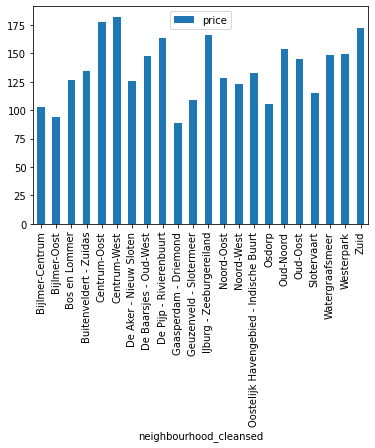

In [6]:
# Посмотрим на распределение цен на апартаменты:

import matplotlib.pyplot as plt

# for column in df.columns:
#     series = df[column]
#     print(column)
#     plt.hist(series,100)
#     plt.show()

#     plt.boxplot(series)
#     plt.show()

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(df['neighbourhood_cleansed'], df['neighbourhood_cleansed'])
# axs[1].bar(df['property_type'], values)
# axs[2].bar(names, values)

display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().plot.bar())
display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False))
display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).count().sort_values(by='price', ascending=False))
display(df[['property_type', 'price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False))
display(df[['property_type', 'price']].groupby(['property_type']).count().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).count().sort_values(by='price', ascending=False))

In [7]:
TARGET_COLUMN = 'price'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]


In [8]:
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# TARGET_COLUMN = 'price'

# ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

# train, test = train_test_split(df, test_size=0.2)

# # Тренировочная выборка
# predictors = train[ALL_BUT_TARGET_COLUMN]
# target = train[[TARGET_COLUMN]]

# # Контрольная выборка
# test_predictors = test[ALL_BUT_TARGET_COLUMN]
# test_target = test[[TARGET_COLUMN]]

# regr = linear_model.LinearRegression()
# est = regr.fit(predictors, target)

# # Предсказываем на контрольной выборке
# prediction = regr.predict(test_predictors)


# mse = mean_squared_error(test_target, prediction)
# mse_root = math.sqrt(mean_squared_error(test_target, prediction))
# r2 = r2_score(test_target, prediction)

# print('MSE: %.2f' % mse)
# print('Mean Error: %.2f' % mse_root)
# print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(regr.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(regr.coef_[0]))
# print(len(ALL_BUT_TARGET_COLUMN))

# Пробуем кросс-валидацию???

In [9]:
# Пробуем использовать нормальную либу для регрессии
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

# Попробуем сократить модель только до самых частых вариантов:
# Entire apartment 	9726
# Private room in apartment 	1836
# Entire house 	970
# Entire townhouse 	399
# Private room in house 	277

part_df=df.where((df['property_type'] == 'Entire apartment') |
            (df['property_type'] == 'Private room in apartment') |
            (df['property_type'] == 'Entire house') |
            (df['property_type'] == 'Entire townhouse') |
            (df['property_type'] == 'Private room in house'))

# part_df=df.where((df['property_type'] == 'Entire apartment'))
# part_df=df.where((df['room_type'] == 'Private room'))
# part_df = df
# display(df.dtypes)

# target = df[TARGET_COLUMN].to_numpy(dtype='float')
# predictors = df[ALL_BUT_TARGET_COLUMN].to_numpy(dtype='float')

equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))
y, X = dmatrices(equation, data=part_df, return_type='dataframe')

model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:06:22   Log-Likelihood:                -75167.
No. Observations:               13208   AIC:                         1.504e+05
Df Residuals:                   13164   BIC:                         1.508e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          -12.4071     12.406     -1.000      0.317     -36.726      11.911
neighbourhood_cleansed[T.Bijlmer-Oost]                             -13.1416     12.550     -1.047      0.295     -37.742      11.459
neighbourhood_cleansed[T.Bos en Lommer]                              1.9910      9.482      0.210      0.834     -16.594      20.576
neighbourhood_cleansed[T.Buitenveldert - Zuidas]                    -4.2141     10.800     -0.390      0.696     -25.384      16.956
neighbourhood_cleansed[T.Centrum-Oost]                              47.5288      9.478      5.015      0.000      28.951      66.107
neighbourhood_cleansed[T.Centrum-West]                              60.3253      9.434      6.394      0.000      41.833      78.818
neighbourhood_cleansed[T.De Aker - Nieuw Sloten]                    -7.0291     12.726     -0.552      0.581     -31.974      17.916
neighbourhood_cleansed[T.De Baarsjes - Oud-West]                    18.4318      9.284      1.985      0.047       0.234      36.630
neighbourhood_cleansed[T.De Pijp - Rivierenbuurt]                   31.1122      9.345      3.329      0.001      12.795      49.429
neighbourhood_cleansed[T.Gaasperdam - Driemond]                    -24.2546     11.888     -2.040      0.041     -47.557      -0.952
neighbourhood_cleansed[T.Geuzenveld - Slotermeer]                  -20.1463     10.889     -1.850      0.064     -41.490       1.197
neighbourhood_cleansed[T.IJburg - Zeeburgereiland]                 -15.8828     10.245     -1.550      0.121     -35.965       4.200
neighbourhood_cleansed[T.Noord-Oost]                               -32.1498     10.823     -2.971      0.003     -53.364     -10.935
neighbourhood_cleansed[T.Noord-West]                               -35.5977     10.254     -3.471      0.001     -55.698     -15.497
neighbourhood_cleansed[T.Oostelijk Havengebied - Indische Buurt]     7.3455      9.569      0.768      0.443     -11.410      26.101
neighbourhood_cleansed[T.Osdorp]                                   -10.6210     11.751     -0.904      0.366     -33.655      12.413
neighbourhood_cleansed[T.Oud-Noord]                                -14.1975      9.985     -1.422      0.155     -33.769       5.374
neighbourhood_cleansed[T.Oud-Oost]                                  12.9874      9.454      1.374      0.170      -5.543      31.518
neighbourhood_cleansed[T.Slotervaart]                               -7.8324     10.097     -0.776      0.438     -27.624      11.959
neighbourhood_cleansed[T.Watergraafsmeer]                           -5.9548     10.017     -0.594      0.552     -25.589      13.679
neighbourhood_cleansed[T

In [10]:
display(results.pvalues.round(3).sort_values(ascending=False))

review_scores_accuracy                                              0.874
neighbourhood_cleansed[T.Bos en Lommer]                             0.834
neighbourhood_cleansed[T.Buitenveldert - Zuidas]                    0.696
property_type[T.Entire townhouse]                                   0.585
neighbourhood_cleansed[T.De Aker - Nieuw Sloten]                    0.581
neighbourhood_cleansed[T.Watergraafsmeer]                           0.552
number_of_reviews                                                   0.537
neighbourhood_cleansed[T.Oostelijk Havengebied - Indische Buurt]    0.443
neighbourhood_cleansed[T.Slotervaart]                               0.438
minimum_nights                                                      0.373
neighbourhood_cleansed[T.Osdorp]                                    0.366
has_availability                                                    0.317
Intercept                                                           0.317
neighbourhood_cleansed[T.Bijlmer-Oost]